In [1]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import streamlit as st
import plotly.express as px

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  Age               Review_Title  \
0  17274   34      Cute fall/holiday top   
1   5921   35                        NaN   
2  16479   40               Disappointed   
3   1925   28         Gorgeous detailing   
4   5691   39  Cute and comfortable tee!   

                                              Review Department  \
0  Love this top! the quality is magnificent and ...       Tops   
1                                                NaN       Tops   
2  Sleeves were tight, was difficult to put on ?....       Tops   
3  I never write reviews but this clothe is so fa...    Clothes   
4  Love this tshirt! casual but can be clotheed u...       Tops   

  Product_Category  Pos_Feedback_Cnt  
0          Blouses                 5  
1          Blouses                 5  
2          Blouses                 2  
3          Clothes                 5  
4            Knits                 5

In [3]:
df.describe()

Id           Age  Pos_Feedback_Cnt
count  14091.000000  14091.000000      14091.000000
mean   11713.941736     43.093677          4.197786
std     6768.152493     12.176401          1.109792
min        0.000000     18.000000          1.000000
25%     5860.000000     34.000000          4.000000
50%    11693.000000     41.000000          5.000000
75%    17555.500000     51.000000          5.000000
max    23485.000000     94.000000          5.000000

In [4]:
df.columns

Index(['Id', 'Age', 'Review_Title', 'Review', 'Department', 'Product_Category',
       'Pos_Feedback_Cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14091 entries, 0 to 14090
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                14091 non-null  int64 
 1   Age               14091 non-null  int64 
 2   Review_Title      11732 non-null  object
 3   Review            13588 non-null  object
 4   Department        14080 non-null  object
 5   Product_Category  14080 non-null  object
 6   Pos_Feedback_Cnt  14091 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 770.7+ KB


In [6]:
df.isnull().sum()

Id                     0
Age                    0
Review_Title        2359
Review               503
Department            11
Product_Category      11
Pos_Feedback_Cnt       0
dtype: int64

<Axes: >

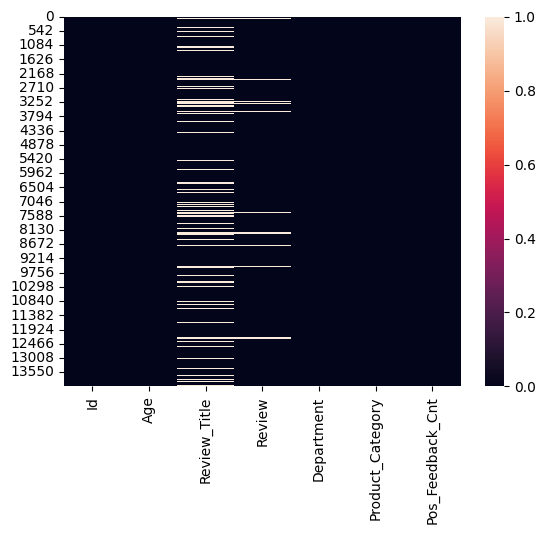

In [7]:
sns.heatmap(df.isnull())

In [8]:
print('T·ªïng s·ªë review:', len(df))

T·ªïng s·ªë review: 14091


In [9]:
# S·ªë review theo nh√£n Pos_Feedback_Cnt (ƒë√°nh gi√° b√¨nh lu·∫≠n c√≥ h·ªØu √≠ch kh√¥ng)
print(df['Pos_Feedback_Cnt'].value_counts())

Pos_Feedback_Cnt
5    7907
4    3001
3    1748
2     933
1     502
Name: count, dtype: int64


In [10]:
#ƒê·ªô d√†i m·ªói review
df['Review_length'] = df['Review'].dropna().apply(len)
df[['Review_length', 'Review']].head()

Review_length                                             Review
0          362.0  Love this top! the quality is magnificent and ...
1            NaN                                                NaN
2          106.0  Sleeves were tight, was difficult to put on ?....
3          376.0  I never write reviews but this clothe is so fa...
4           72.0  Love this tshirt! casual but can be clotheed u...

In [11]:
avg_length = df['Review_length'].mean()
median_length = df['Review_length'].median()
std_length = df['Review_length'].std()

In [12]:
print(f"ƒê·ªô d√†i trung b√¨nh: {avg_length:.2f}, Trung v·ªã: {median_length}, ƒê·ªô l·ªách chu·∫©n: {std_length:.2f}")

ƒê·ªô d√†i trung b√¨nh: 308.84, Trung v·ªã: 301.0, ƒê·ªô l·ªách chu·∫©n: 144.31


In [13]:
# Top 10 s·∫£n ph·∫©m ƒë∆∞·ª£c ph·∫£n h·ªìi t√≠ch c·ª±c nh·∫•t
top_pos_feedback = df.sort_values("Pos_Feedback_Cnt", ascending=False)[["Review_Title", "Pos_Feedback_Cnt"]].head(10)
display(top_pos_feedback)

Review_Title  Pos_Feedback_Cnt
15                    Beautiful!                 5
14089          Really versatile!                 5
0          Cute fall/holiday top                 5
1                            NaN                 5
14088                  Gorgeous!                 5
3             Gorgeous detailing                 5
4      Cute and comfortable tee!                 5
14087     Soft, snuggly and cute                 5
6                            NaN                 5
14049                   Gorgeous                 5

In [14]:
# T·∫°o c·ªôt Label : nh√£n t·ªët (1) n·∫øu Pos_Feedback_Cnt >= 10, ng∆∞·ª£c l·∫°i l√† 0
df["Label"] = df['Pos_Feedback_Cnt'].apply(lambda x : 1 if x >= 3 else 0)
df['Label'].head(12)

0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     0
10    1
11    1
Name: Label, dtype: int64

<Axes: title={'center': 'Phan bo review tot va xau'}, ylabel='count'>

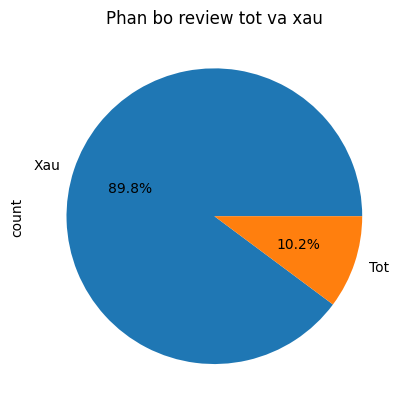

In [15]:
reviews_by_label = df["Label"].value_counts()
reviews_by_label.index = ['Xau', 'Tot']

reviews_by_label.plot(kind = 'pie', autopct = '%1.1f%%', title = 'Phan bo review tot va xau')

### Ph√¢n t√≠ch t·ª´ v·ª±ng v√† WordCloud

In [16]:
#l·ªçc b·ªè c√°c review thi·∫øu
df_reviews = df.dropna(subset = ['Review_Title', 'Review'])
df_reviews

Id  Age               Review_Title  \
0      17274   34      Cute fall/holiday top   
2      16479   40               Disappointed   
3       1925   28         Gorgeous detailing   
4       5691   39  Cute and comfortable tee!   
5      21414   45               Disappointed   
...      ...  ...                        ...   
14084   4187   53            Sweet and comfy   
14086  13641   38                  Too flowy   
14087   2245   44     Soft, snuggly and cute   
14088  16929   44                  Gorgeous!   
14089   7362   54          Really versatile!   

                                                  Review Department  \
0      Love this top! the quality is magnificent and ...       Tops   
2      Sleeves were tight, was difficult to put on ?....       Tops   
3      I never write reviews but this clothe is so fa...    Clothes   
4      Love this tshirt! casual but can be clotheed u...       Tops   
5      I was so smitten by this shirt when i saw it o...       Tops   
...                                                  ...        ...   
14084  I like this comfy top. i bought it to wear wit...       Tops   
14086  The pattern and fabric on this clothe are very...    Clothes   
14087  Like the previous reviewer stated, it's more l...       Tops   
14088  This sweater is so lovely.. i like the fact th...       Tops   
14089  I just love this top, it has a flattering cut,...       Tops   

      Product_Category  Pos_Feedback_Cnt  Review_length  Label  
0              Blouses                 5          362.0      1  
2              Blouses                 2          106.0      0  
3              Clothes                 5          376.0      1  
4                Knits                 5           72.0      1  
5                Knits                 2          501.0      0  
...                ...               ...            ...    ...  
14084            Knits                 4          467.0      1  
14086          Clothes                 3          165.0      1  
14087         Sweaters                 5          501.0      1  
14088         Sweaters                 5          404.0      1  
14089          Blouses                 5          342.0      1  

[11731 rows x 9 columns]

In [17]:
#Wordcloud t·ªïng th·ªÉ
text_all = " ".join(df_reviews['Review'])

Text(0.5, 1.0, 'WordCloud to√†n b·ªô review')

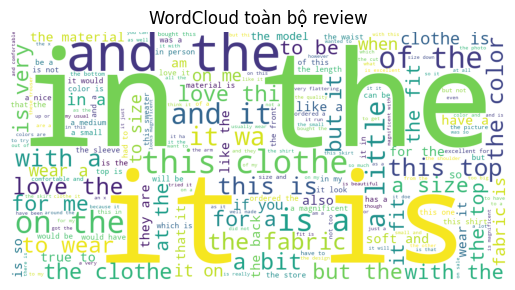

In [18]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords='english').generate(text_all)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud to√†n b·ªô review')

### Ph√¢n t√≠ch t·ª´ kh√≥a theo Label

In [19]:
good_review = df[df['Label'] == 1]
bad_review = df[df['Label'] == 0]

In [20]:
# review tot va xau
wc_good = WordCloud (width=800, height = 400, background_color = 'White').generate(' '.join(good_review['Review'].dropna()))
wc_bad = WordCloud (width = 800, height = 400, background_color = 'White').generate(" ".join(bad_review['Review'].dropna()))

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

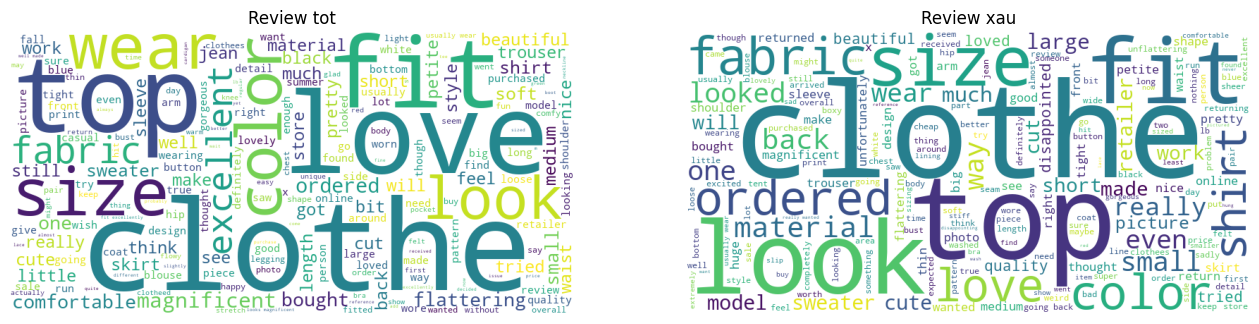

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
axs[0].imshow(wc_good)
axs[0].set_title ('Review tot')
axs[0].axis('off')

axs[1].imshow(wc_bad)
axs[1].set_title ('Review xau')
axs[1].axis('off')

# plt.tight_layout()

### Ph√¢n t√≠ch ƒë·ªô d√†i review

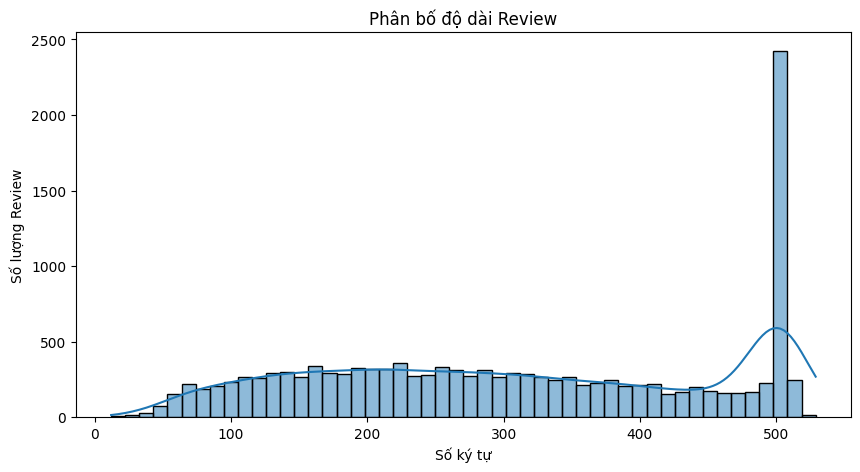

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Review_length'], bins=50, kde=True)
plt.title("Ph√¢n b·ªë ƒë·ªô d√†i Review")
plt.xlabel("S·ªë k√Ω t·ª±")
plt.ylabel("S·ªë l∆∞·ª£ng Review")
plt.show()

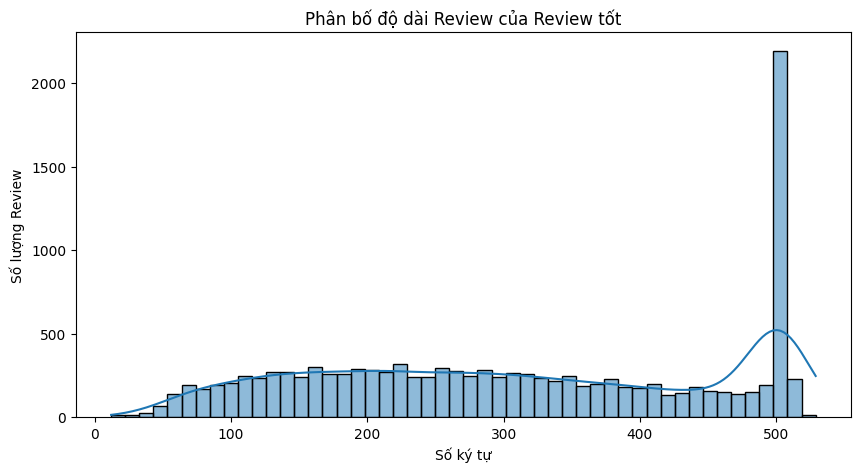

In [23]:
#review tot 
plt.figure(figsize=(10, 5))
sns.histplot(good_review['Review_length'], bins=50, kde=True)
plt.title("Ph√¢n b·ªë ƒë·ªô d√†i Review c·ªßa Review t·ªët")
plt.xlabel("S·ªë k√Ω t·ª±")
plt.ylabel("S·ªë l∆∞·ª£ng Review")
plt.show()

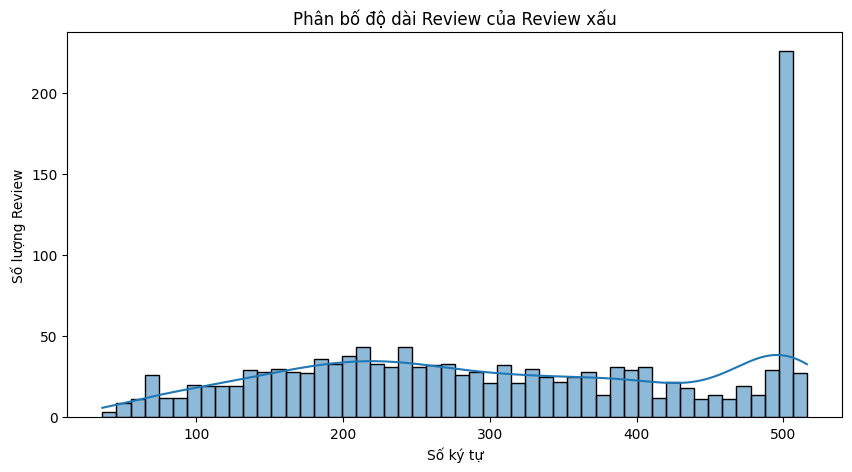

In [24]:
#review xau
plt.figure(figsize=(10, 5))
sns.histplot(bad_review['Review_length'], bins=50, kde=True)
plt.title("Ph√¢n b·ªë ƒë·ªô d√†i Review c·ªßa Review x·∫•u")
plt.xlabel("S·ªë k√Ω t·ª±")
plt.ylabel("S·ªë l∆∞·ª£ng Review")
plt.show()

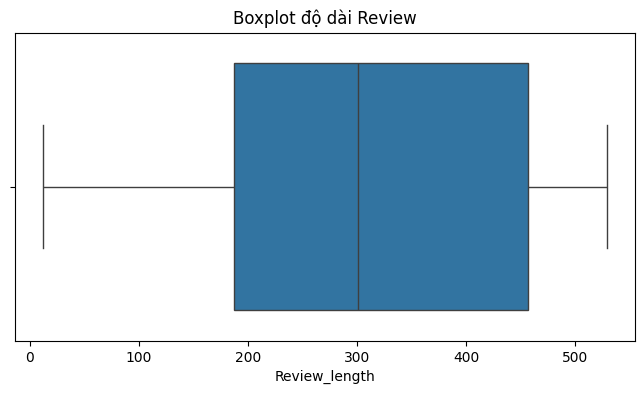

In [25]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Review_length'])
plt.title("Boxplot ƒë·ªô d√†i Review")
plt.show()

### T·∫ßn su·∫•t t·ª´ kh√≥a & Bigram

In [26]:
# L·∫•y ra top 20 t·ª´ ƒë∆°n
vectorizer = CountVectorizer(stop_words='english') 
X_counts = vectorizer.fit_transform (df_reviews['Review'].astype(str))
#.toarray() bi·∫øn ma tr·∫≠n sparse th√†nh m·∫£ng.
word_freq = dict(zip(vectorizer.get_feature_names_out(), X_counts.toarray().sum(axis=0))) #cong theo cot

In [27]:
# Hi·ªÉn th·ªã 20 t·ª´ ph·ªï bi·∫øn nh·∫•t
top_words = sorted(word_freq.items(), key = lambda x : x[1], reverse = True)[:20]
for k, v in top_words:
    print(f"{k}: {v}")

clothe: 5554
size: 4708
love: 4610
fit: 3966
like: 3792
wear: 3480
magnificent: 3112
just: 3057
fabric: 2517
small: 2485
color: 2415
look: 2128
really: 2088
excellent: 2085
ordered: 2050
little: 1983
flattering: 1862
soft: 1792
bought: 1624
comfortable: 1621


In [28]:
# bigram
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = bigram_vectorizer.fit_transform(df_reviews['Review'].astype(str))
bigram_freq = dict(zip(bigram_vectorizer.get_feature_names_out(), X_bigrams.toarray().sum(axis=0)))
top_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:20]
print("\nTop 20 Bigram ph·ªï bi·∫øn:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")


Top 20 Bigram ph·ªï bi·∫øn:
in the: 3740
it is: 3273
and the: 2988
this clothe: 2470
on the: 2271
of the: 2140
and it: 1958
it was: 1634
this top: 1510
this is: 1438
the fabric: 1406
love the: 1340
to wear: 1263
is very: 1233
love this: 1179
but it: 1156
the clothe: 1154
but the: 1090
for me: 1082
with the: 1070


### 3.1 Ph√°t tri·ªÉn Dashboard t∆∞∆°ng t√°c

### Ph·∫ßn n√†y ch·∫°y trong VSC

2025-05-15 11:13:19.812 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:19.819 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.768 
  command:

    streamlit run C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-15 11:13:20.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-15 11:13:20.778 Thread 'MainThread': missing ScriptRunContext! This wa

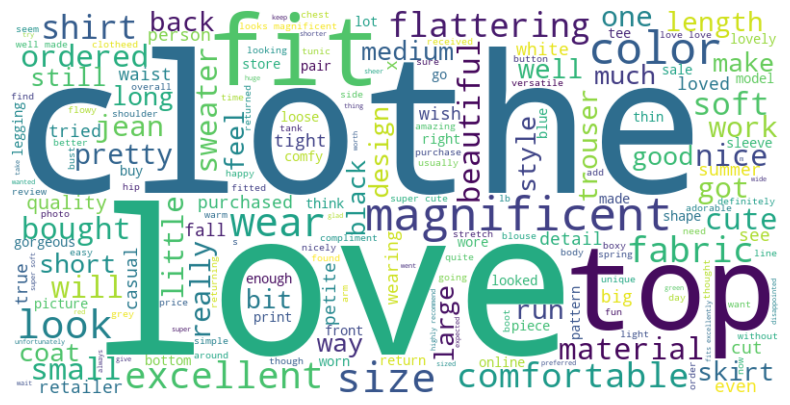

In [29]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import streamlit as st
import plotly.express as px

df = pd.read_csv("Nh√≥m-7-Women_Clothes_Data.csv")
df['Review_length'] = df['Review'].astype(str).apply(len)

# T·∫°o c·ªôt Label (gi·∫£ s·ª≠ ph√¢n lo·∫°i review t·ªët n·∫øu Pos_Feedback_Cnt >= 5, ng∆∞·ª£c l·∫°i l√† x·∫•u)
df['Label'] = df['Pos_Feedback_Cnt'].apply(lambda x: 'T·ªët' if x >= 5 else 'X·∫•u')

st.set_page_config(layout="wide")
st.title("üìä Dashboard EDA - Women Clothing Reviews")

# Sidebar filter
st.sidebar.header("üîç B·ªô l·ªçc")
selected_label = st.sidebar.selectbox("Ch·ªçn Label:", options=df['Label'].unique())
length_range = st.sidebar.slider("Ch·ªçn ƒë·ªô d√†i review:", int(df['Review_length'].min()), int(df['Review_length'].max()), (20, 300))

# L·ªçc d·ªØ li·ªáu
df_filtered = df[(df['Label'] == selected_label) & (df['Review_length'].between(*length_range))]

# Tabs layout
tabs = st.tabs(["üìà T·ªïng quan", "‚òÅÔ∏è WordCloud", "üß† T·ª´ kh√≥a", "üìä So s√°nh m√¥ h√¨nh"])

with tabs[0]:
    st.subheader("T·ªïng quan d·ªØ li·ªáu")
    col1, col2 = st.columns(2)
    with col1:
        st.metric("S·ªë l∆∞·ª£ng review", df_filtered.shape[0])
        fig_len = px.histogram(df_filtered, x='Review_length', nbins=40, title="Ph√¢n b·ªë ƒë·ªô d√†i review")
        st.plotly_chart(fig_len, use_container_width=True)
    with col2:
        label_count = df['Label'].value_counts()
        fig_pie = px.pie(values=label_count.values, names=label_count.index, title="T·ªâ l·ªá c√°c Label")
        st.plotly_chart(fig_pie, use_container_width=True)

with tabs[1]:
    st.subheader("WordCloud theo Label ƒë√£ ch·ªçn")
    wc_text = " ".join(df_filtered['Review'].dropna().astype(str).values)
    wc = WordCloud(width=800, height=400, background_color='white').generate(wc_text)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    st.pyplot(fig)

with tabs[2]:
    st.subheader("T·ª´ kh√≥a ph·ªï bi·∫øn")
    vectorizer = CountVectorizer(stop_words='english', max_features=30)
    X = vectorizer.fit_transform(df_filtered['Review'].dropna().astype(str))
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    keyword_df = pd.DataFrame(word_freq.items(), columns=['T·ª´ kh√≥a', 'T·∫ßn su·∫•t']).sort_values(by='T·∫ßn su·∫•t', ascending=False)
    st.dataframe(keyword_df)

with tabs[3]:
    st.subheader("So s√°nh m√¥ h√¨nh (Placeholder)")
    st.info("C√≥ th·ªÉ th√™m bi·ªÉu ƒë·ªì Confusion Matrix, ROC Curve ·ªü ƒë√¢y.")